# Text Mining

In [1]:
import pandas as pd
import numpy as np

In [2]:
sms = pd.read_csv('../data/sms_spam_collection.csv')
sms.head()

,Unnamed: 0,label,message
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
sms['label'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

## Text Preprocessing

Method :
1. converting to lower case
1. contraction
1. remove or convert number into text
1. remove punctuation
1. remove white spaces
1. remove stopwords and particular words

## 1. Coverting to lower case

In [4]:
def to_lower(text):
    return text.lower()

In [5]:
text_1 = 'Winter December 10th 2019'
to_lower(text_1)

'winter december 10th 2019'

## 2. Contraction

In [6]:
import re

In [7]:
contractions_dict = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he shall",
"he'll've": "he shall have",
"he's": "he has",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I shall",
"I'll've": "I shall have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it shall",
"it'll've": "it shall have",
"it's": "it has",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she shall",
"she'll've": "she shall have",
"she's": "she has",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that has",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there has",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they shall",
"they'll've": "they shall have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall",
"what'll've": "what shall have",
"what're": "what are",
"what's": "what has",
"what've": "what have",
"when's": "when has",
"when've": "when have",
"where'd": "where did",
"where's": "where has",
"where've": "where have",
"who'll": "who shall",
"who'll've": "who shall have",
"who's": "who has",
"who've": "who have",
"why's": "why has",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def main_contraction(text):
    text = expand_contractions(text, contractions_dict)
    return text

In [8]:
text_2 = "If ain't got you"
main_contraction(text_2)

'If am not got you'

## Remove or Convert Number Into Text

In [9]:
def remove_numbers(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

In [10]:
text_string = "I was born in 1996"
text_string = remove_numbers(text_string)
print(text_string)

I was born in 


## Remove Punctuation

In [11]:
from string import punctuation

In [12]:
def remove_punct(text):
    return ''.join(c for c in text if c not in punctuation)

In [13]:
text_string = "There was bobby, alex, fergie and I"
text_string = remove_punct(text_string)
print(text_string)

There was bobby alex fergie and I


## Remove White Spaces

In [14]:
def to_strip(text):
    return ' '.join(text.split())

In [15]:
text_string = "There was          bobby, alex, fergie and I"
text_string = to_strip(text_string)
print(text_string)

There was bobby, alex, fergie and I


## Remove Stopwords and Particular Words

Stopwords are words that occur too often and do not provide any additional insight
<br>
Stopwords example:
I, me, myself, we, our, ourselves, you, yourself, ….. 


In [160]:
import nltk
from nltk.corpus import stopwords

In [17]:
stopwords.words('english').index('from')

87

In [18]:
len(stopwords.words('indonesian'))

758

In [19]:
def remove_stopwords(sentence):
    stop_words = stopwords.words('english')
    stop_words.extend(['u', 'U', 'dun', 'ü', 'fr'])
    return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

In [20]:
stopwords.words('english').extend(['u', 'U', 'dun', 'ü', 'fr'])

In [21]:
text_string = "There was bobby, alex, fergie and I"
text_string = remove_stopwords(text_string)
print(text_string)

There bobby , alex , fergie I


In [22]:
nltk.word_tokenize(text_string)

['There', 'bobby', ',', 'alex', ',', 'fergie', 'I']

## Combine Preprocessing Method

In [23]:
pd.options.display.max_colwidth = None

In [24]:
sms.columns

Index(['Unnamed: 0', 'label', 'message'], dtype='object')

In [25]:
sms['message_prep1'] = sms['message'].apply(to_lower) # hurufnya dikecilin semua (Hello dan hello) 
sms['message_prep2'] = sms['message_prep1'].apply(main_contraction) # melengkapkan kata / menghilangkan singkatan
sms['message_prep3'] = sms['message_prep2'].apply(remove_numbers) # menghilangkan angka
sms['message_prep4'] = sms['message_prep3'].apply(remove_punct) # menghilangkan tanda baca (Hello!, Hello?)
sms['message_prep5'] = sms['message_prep4'].apply(to_strip) # menghilangkan spasi yang berlebih
sms['message_prep6'] = sms['message_prep5'].apply(remove_stopwords) # menghilangkan kata yang seringkali muncul

sms[['label', 'message', 'message_prep6']]

,label,message,message_prep6
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply overs
3,ham,U dun say so early hor... U c already then say...,say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah think goes usf lives around though
...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",nd time tried contact £ pound prize claim easy call p per minute btnationalrate
5568,ham,Will ü b going to esplanade fr home?,b going esplanade home
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",pity mood soany suggestions
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,guy bitching acted like interested buying something else next week gave us free


# Text Preprocessing 2

## Stemming
The process of transforming to the root word.
For example you have caring, cares, cared, caringly carefully then you want to consider them as the same words “care”.
We need stemming because treating them as the same words will reduce overfitting.

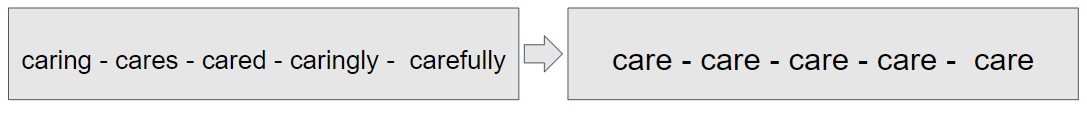

In [26]:
from nltk.stem import SnowballStemmer

In [27]:
snowball_stem = SnowballStemmer('english')

def stem(text):
    stemmed_word = [snowball_stem.stem(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(text)]
    return " ".join(stemmed_word)

In [28]:
text_1 ='I am reading a book and the book is very fascinating'
stem(text_1)

'i am read a book and the book is veri fascin'

In [44]:
stem('carefully')

'care'

## Lemmatization

The process of transforming to the dictionary base form.
caring, cares, cared, caringly carefully will be transformed into care, care, care caringly carefully.
caringly and carefully are listed in the dictionary.
purpose of lemmatization is also to reduce overfitting.

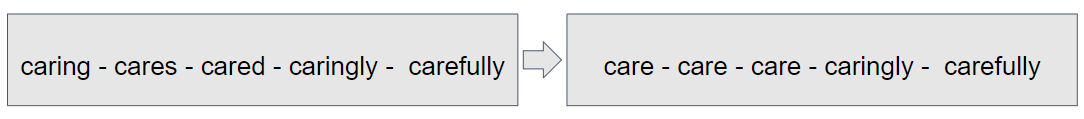

In [29]:
from nltk.stem import WordNetLemmatizer

In [30]:
wordnet_lemma = WordNetLemmatizer()

In [31]:
def lemmatize(text):
    lemma_word = [wordnet_lemma.lemmatize(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return " ".join(lemma_word)

In [32]:
lemmatize(text_1)

'I am reading a book and the book is very fascinating'

In [40]:
lemmatize('carefully')

'carefully'

In [57]:
sms['message_stem'] = sms['message_prep6'].apply(stem)
sms['message_lemma'] = sms['message_prep6'].apply(lemmatize)

## Text Exploration

## Word Freq

In [45]:
import seaborn as sns

In [61]:
def kamus(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()
    
    kamus = {'kata': check.index, 'freq': check.values}
    kamus = pd.DataFrame(kamus)
    kamus.index = kamus['kata']
    kamus.drop('kata', axis=1, inplace=True)
    kamus.sort_values('freq', ascending=False, inplace=True)
    
    return kamus

In [55]:
check = pd.Series(['there she goes, there she goes again'])

check = check.str.extractall('([a-zA_Z]+)')
check.columns = ['check']
b = check.reset_index(drop=True)
check = b['check'].value_counts()

kamus = {'kata': check.index, 'freq': check.values}
kamus = pd.DataFrame(kamus)
kamus.index = kamus['kata']
kamus.drop('kata', axis=1, inplace=True)
kamus.sort_values('freq', ascending=False, inplace=True)
# check
# b
kamus

,freq
kata,
goes,2
she,2
there,2
again,1


In [58]:
sms.head()

,Unnamed: 0,label,message,message_prep1,message_prep2,message_prep3,message_prep4,message_prep5,message_prep6,message_stem,message_lemma
0,0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,go jurong point crazy available bugis n great world la e buffet cine got amore wat,go jurong point crazi avail bugi n great world la e buffet cine got amor wat,go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif oni,ok lar joke wif oni,ok lar joking wif oni
2,2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&cs apply 08452810075over18s,free entry in a wkly comp to win fa cup final tkts st may . text fa to to receive entry question(std txt rate)t&cs apply overs,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs,free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply overs,free entri wkli comp win fa cup final tkts st may text fa receiv entri questionstd txt ratetc appli over,free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply over
3,3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,say early hor c already say,say earli hor c alreadi say,say early hor c already say
4,4,ham,"Nah I don't think he goes to usf, he lives around here though","nah i don't think he goes to usf, he lives around here though","nah i do not think he goes to usf, he lives around here though","nah i do not think he goes to usf, he lives around here though",nah i do not think he goes to usf he lives around here though,nah i do not think he goes to usf he lives around here though,nah think goes usf lives around though,nah think goe usf live around though,nah think go usf life around though


In [59]:
sms['message_lemma']

0                               go jurong point crazy available bugis n great world la e buffet cine got amore wat
1                                                                                            ok lar joking wif oni
2       free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply over
3                                                                                      say early hor c already say
4                                                                              nah think go usf life around though
                                                           ...                                                    
5567                               nd time tried contact £ pound prize claim easy call p per minute btnationalrate
5568                                                                                        b going esplanade home
5569                                                                            

<AxesSubplot:ylabel='kata'>

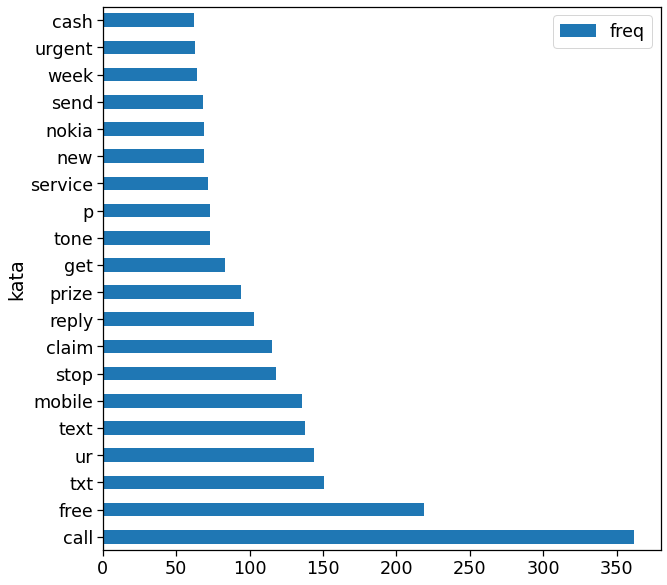

In [63]:
kamus_clean = kamus(sms[sms['label'] == 'spam']['message_lemma'])
sns.set_context(context='notebook', font_scale=1.6)
kamus_clean[:20].plot(kind='barh', figsize=(10,10))
# plt.show()

<AxesSubplot:ylabel='kata'>

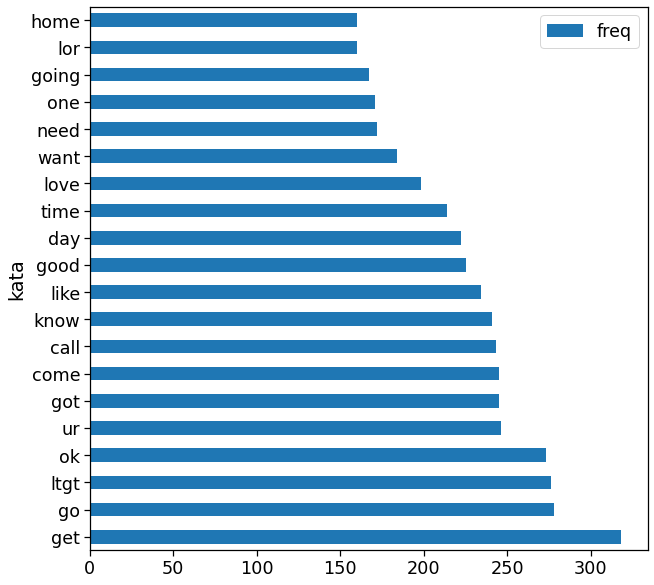

In [64]:
kamus_clean = kamus(sms[sms['label'] == 'ham']['message_lemma'])
sns.set_context(context='notebook', font_scale=1.6)
kamus_clean[:20].plot(kind='barh', figsize=(10,10))

## Word Cloud

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [66]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(20,20))
    plt.imshow(wordcloud)
    plt.axis('off')

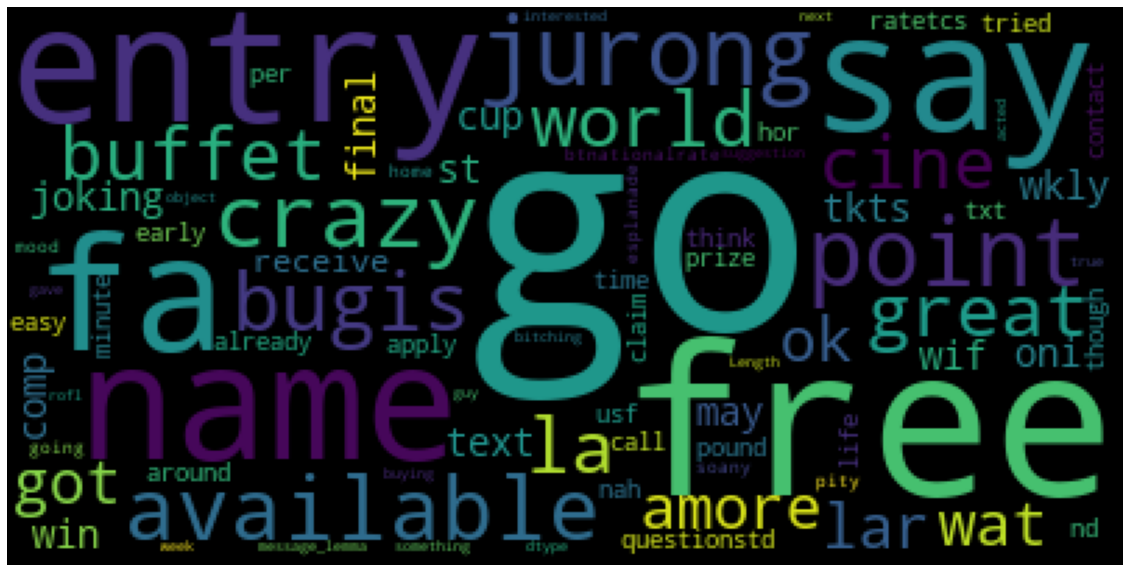

In [69]:
word_cloud = WordCloud().generate(str(sms['message_lemma']))
plot_cloud(word_cloud)

In [68]:
word_cloud

In [70]:
word_cloud

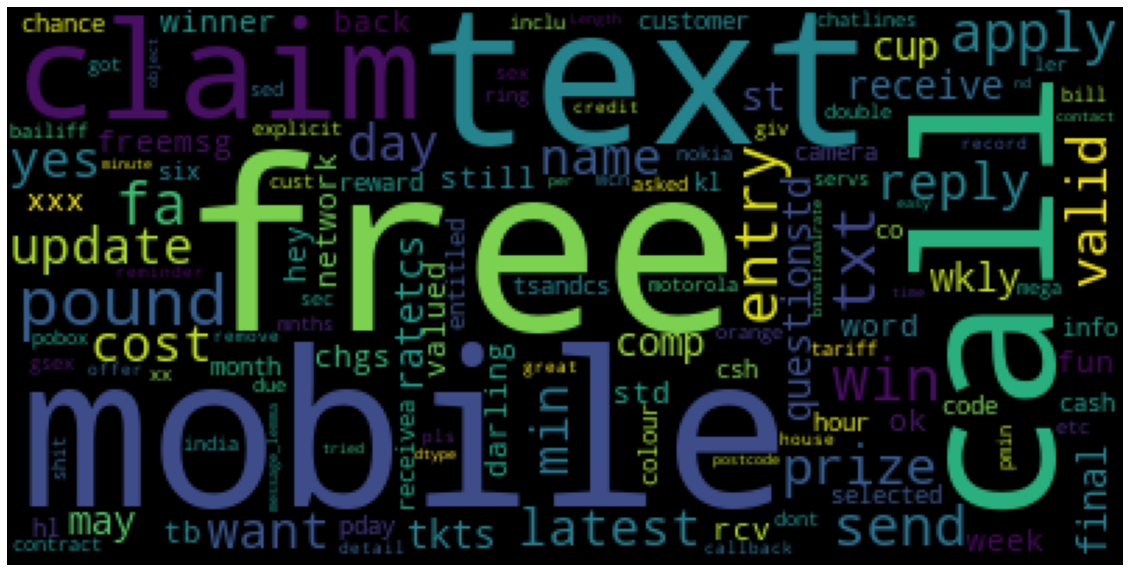

In [71]:
word_cloud_spam = WordCloud().generate(str(sms[sms['label'] == 'spam']['message_lemma']))
plot_cloud(word_cloud_spam)

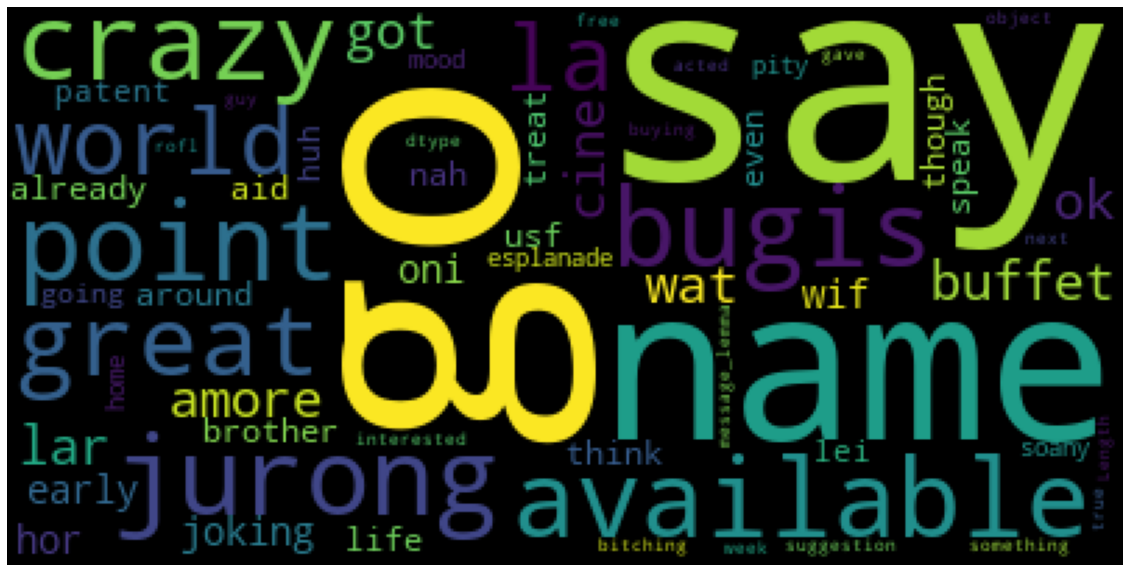

In [73]:
word_cloud_ham = WordCloud().generate(str(sms[sms['label'] == 'ham']['message_lemma']))
plot_cloud(word_cloud_ham)

## Length of Sentence

In [75]:
sms['length'] = sms['message'].apply(len)

C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


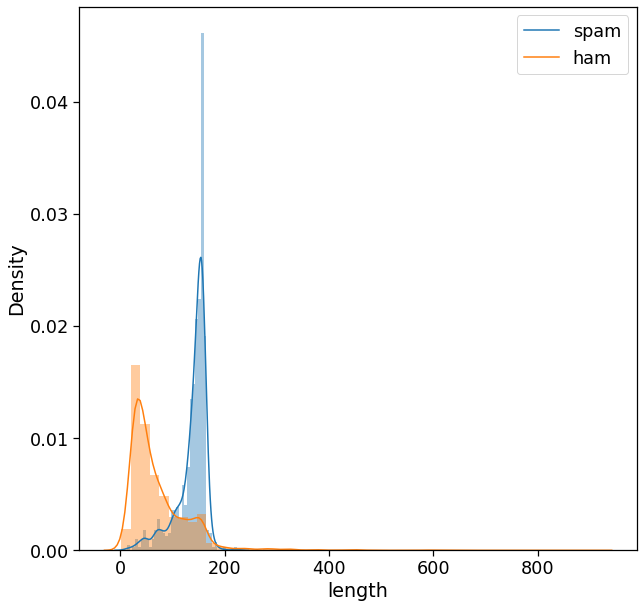

In [76]:
plt.figure(figsize=(10,10))

sms_spam = sms[sms['label'] == 'spam']
sms_ham = sms[sms['label'] == 'ham']

sns.distplot(sms_spam['length'])
sns.distplot(sms_ham['length'])

plt.legend(['spam', 'ham'])

plt.show()

In [77]:
print(sms_ham[sms_ham['length'] == sms_ham['length'].max()]['message'])

1085    For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..
Name: message, dtype: object


## Document Term Matrix

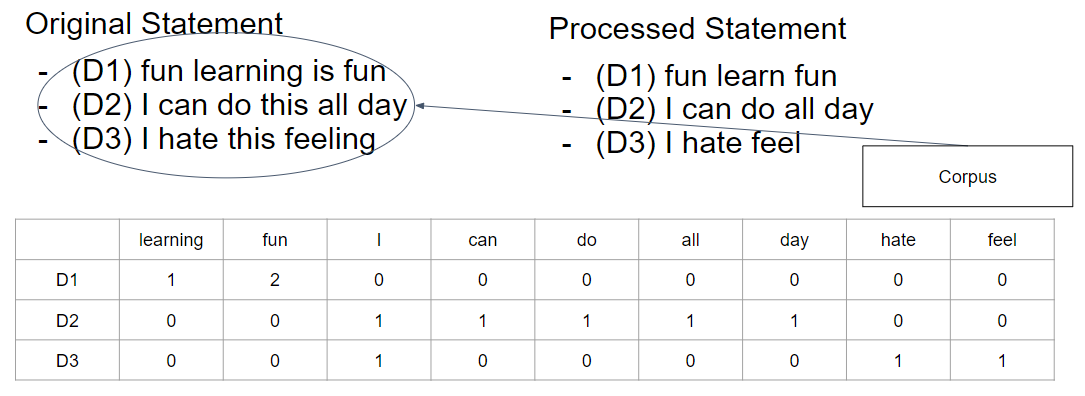

In [94]:
words_example = ["You already know me, don't you?", "I am the best there is.", 'Already know about that']

In [95]:
from sklearn.feature_extraction.text import CountVectorizer

In [96]:
vect = CountVectorizer()
vect.fit(words_example)

CountVectorizer()

In [97]:
print('Vocab Size: {}'.format(len(vect.vocabulary_)))
print('Vocab Content: {}'.format(vect.vocabulary_))

Vocab Size: 12
Vocab Content: {'you': 11, 'already': 1, 'know': 6, 'me': 7, 'don': 4, 'am': 2, 'the': 9, 'best': 3, 'there': 10, 'is': 5, 'about': 0, 'that': 8}


In [89]:
dtm = vect.transform(words_example)

In [90]:
dtm.toarray()

array([[1, 0, 0, 1, 0, 1, 1, 0, 0, 2],
       [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]], dtype=int64)

In [91]:
vect.get_feature_names()

['already', 'am', 'best', 'don', 'is', 'know', 'me', 'the', 'there', 'you']

In [93]:
dtm_df = pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())
dtm_df['text'] = words_example
dtm_df

,already,am,best,don,is,know,me,the,there,you,text
0,1,0,0,1,0,1,1,0,0,2,"You already know me, don't you?"
1,0,1,1,0,1,0,0,1,1,0,I am the best there is.


## N-Grams

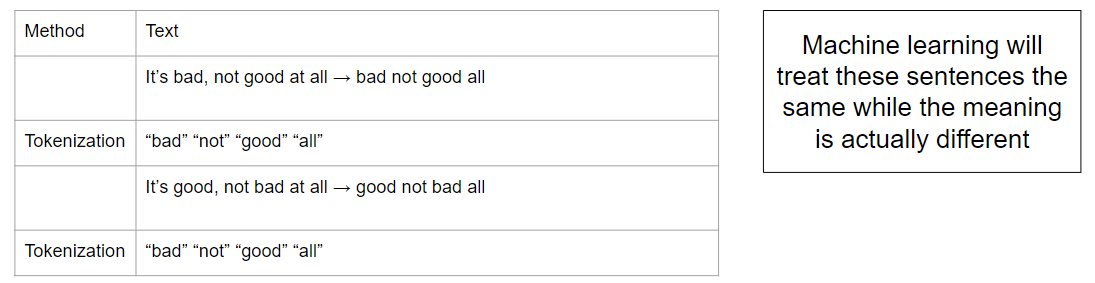

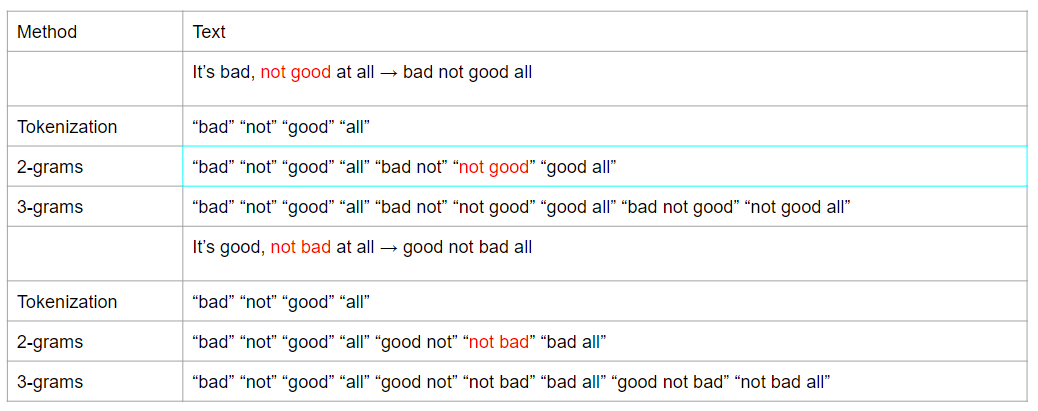

In [99]:
words_example

["You already know me, don't you?",
 'I am the best there is.',
 'Already know about that']

In [100]:
vect_2gram = CountVectorizer(ngram_range=(1,2))
vect_2gram.fit(words_example)

CountVectorizer(ngram_range=(1, 2))

In [101]:
print('Vocab Size: {}'.format(len(vect_2gram.vocabulary_)))
print('Vocab Content: {}'.format(vect_2gram.vocabulary_))

Vocab Size: 23
Vocab Content: {'you': 21, 'already': 2, 'know': 11, 'me': 14, 'don': 8, 'you already': 22, 'already know': 3, 'know me': 13, 'me don': 15, 'don you': 9, 'am': 4, 'the': 17, 'best': 6, 'there': 19, 'is': 10, 'am the': 5, 'the best': 18, 'best there': 7, 'there is': 20, 'about': 0, 'that': 16, 'know about': 12, 'about that': 1}


In [103]:
dtm_2gram = pd.DataFrame(vect_2gram.transform(words_example).toarray(), columns=vect_2gram.get_feature_names())
dtm_2gram['text'] = words_example
dtm_2gram

,about,about that,already,already know,am,am the,best,best there,don,don you,...,me,me don,that,the,the best,there,there is,you,you already,text
0,0,0,1,1,0,0,0,0,1,1,...,1,1,0,0,0,0,0,2,1,"You already know me, don't you?"
1,0,0,0,0,1,1,1,1,0,0,...,0,0,0,1,1,1,1,0,0,I am the best there is.
2,1,1,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Already know about that


## TF-IDF

rescale features by how informative we expect them to be.
give high weight to any term appear often in particular document, not in many documents.
tfidf(word, doc) = tf(word) log((N+1)/(Nw+1)) + 1, with 
- tf(word, doc) : term freq of certain word of document
- Nw : number of doc where the words appear
- N : number of doc in training set


TF-IDF Calculation
<br>
tfidf(word, doc) = tf(word,doc) log((N+1)/(Nw+1)) + 1, with
- tfidf for word learning and document D1
- N = 3, Nw = 1, tf(learning,D1) = 1
- tfidf(learning, D1) =  1 log(4/2) + 1 = 1.693	


Original Statement
- (D1) fun learning is fun
- (D2) I can do this all day
- (D3) I hate this feeling


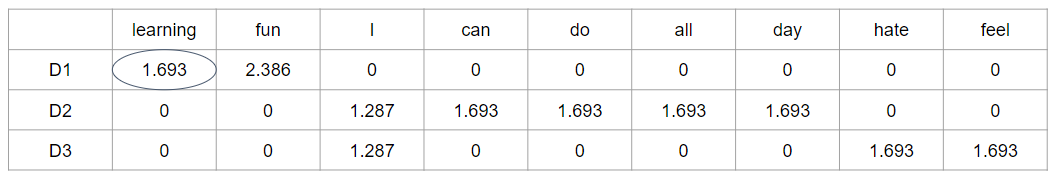

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [110]:
vect = TfidfVectorizer(ngram_range=(1,2))
vect.fit(words_example)

TfidfVectorizer(ngram_range=(1, 2))

In [111]:
print('Vocab Size: {}'.format(len(vect.vocabulary_)))
print('Vocab Content: {}'.format(vect.vocabulary_))

Vocab Size: 23
Vocab Content: {'you': 21, 'already': 2, 'know': 11, 'me': 14, 'don': 8, 'you already': 22, 'already know': 3, 'know me': 13, 'me don': 15, 'don you': 9, 'am': 4, 'the': 17, 'best': 6, 'there': 19, 'is': 10, 'am the': 5, 'the best': 18, 'best there': 7, 'there is': 20, 'about': 0, 'that': 16, 'know about': 12, 'about that': 1}


In [112]:
dtm_tf_idf = vect.transform(words_example)

In [113]:
dtm_tf_idf_df = pd.DataFrame(dtm_tf_idf.toarray(), columns=vect.get_feature_names())

In [114]:
dtm_tf_idf_df

,about,about that,already,already know,am,am the,best,best there,don,don you,...,know me,me,me don,that,the,the best,there,there is,you,you already
0,0.000000,0.000000,0.222008,0.222008,0.000000,0.000000,0.000000,0.000000,0.291914,0.291914,...,0.291914,0.291914,0.291914,0.000000,0.000000,0.000000,0.000000,0.000000,0.583828,0.291914
1,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.333333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.333333,0.000000,0.000000
2,0.417567,0.417567,0.317570,0.317570,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.417567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Spam Detector

In [116]:
len(sms)

5572

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
text = sms['message_lemma']
y = np.where(sms['label'] == 'spam', 1,0)

In [119]:
text_train, text_test, y_train, y_test = train_test_split(text, y, test_size=.2)

## fit and transform method

In [120]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
X_test = vect.transform(text_test)

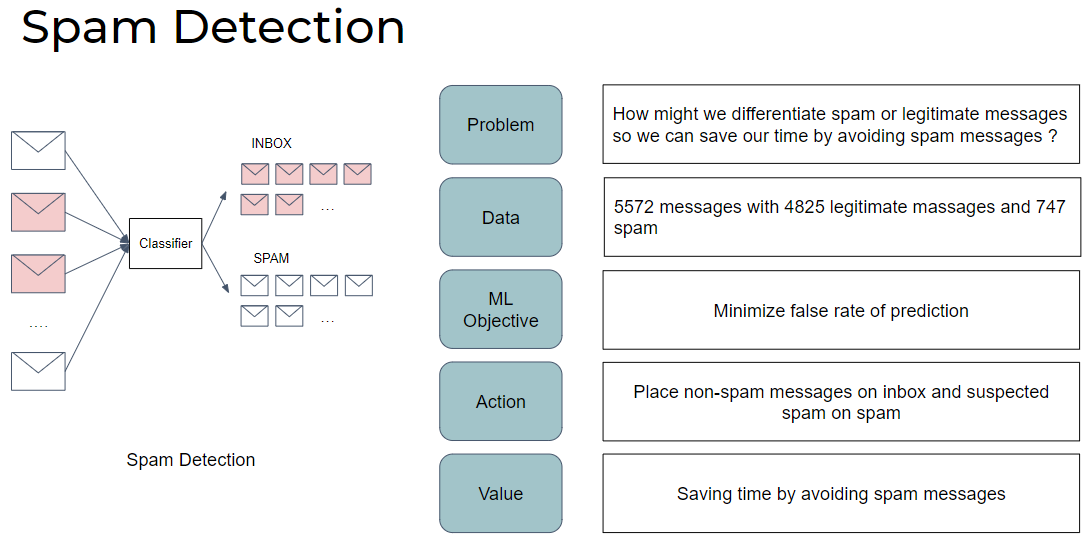

You can use some algo you already learned
- Logistic Regression
- RF
- Boosting, etc

<br>

There are another method such as
- Naive Bayes
- Support Vector Classifier (SVC)
- Deep Learning


In [128]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

## Logit

In [129]:
spam_detector = Pipeline([
    ('cvt', CountVectorizer(ngram_range=(1,2))),
    ('logit', LogisticRegression())
])

In [132]:
spam_detector.fit(text_train, y_train)

Pipeline(steps=[('cvt', CountVectorizer(ngram_range=(1, 2))),
                ('logit', LogisticRegression())])

In [133]:
y_pred = spam_detector.predict(text_test)

In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



## Naive-Bayes

In [135]:
spam_detectorNB = Pipeline([
    ('cvt', CountVectorizer(ngram_range=(1,2))),
    ('nb', MultinomialNB())
])

In [136]:
spam_detectorNB.fit(text_train, y_train)

Pipeline(steps=[('cvt', CountVectorizer(ngram_range=(1, 2))),
                ('nb', MultinomialNB())])

In [137]:
y_predNB = spam_detectorNB.predict(text_test)

In [138]:
print(classification_report(y_test, y_predNB))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.97      0.93      0.95       150

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [139]:
from sklearn.metrics import plot_confusion_matrix

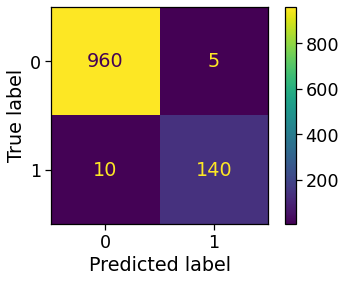

In [140]:
plot_confusion_matrix(spam_detectorNB, text_test, y_test)

In [142]:
5/145

0.034482758620689655

In [143]:
10/970

0.010309278350515464

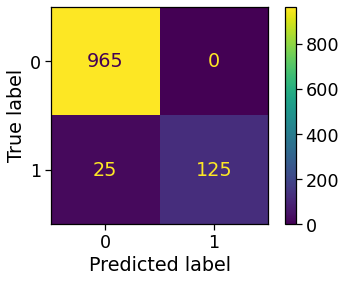

In [141]:
plot_confusion_matrix(spam_detector, text_test, y_test)

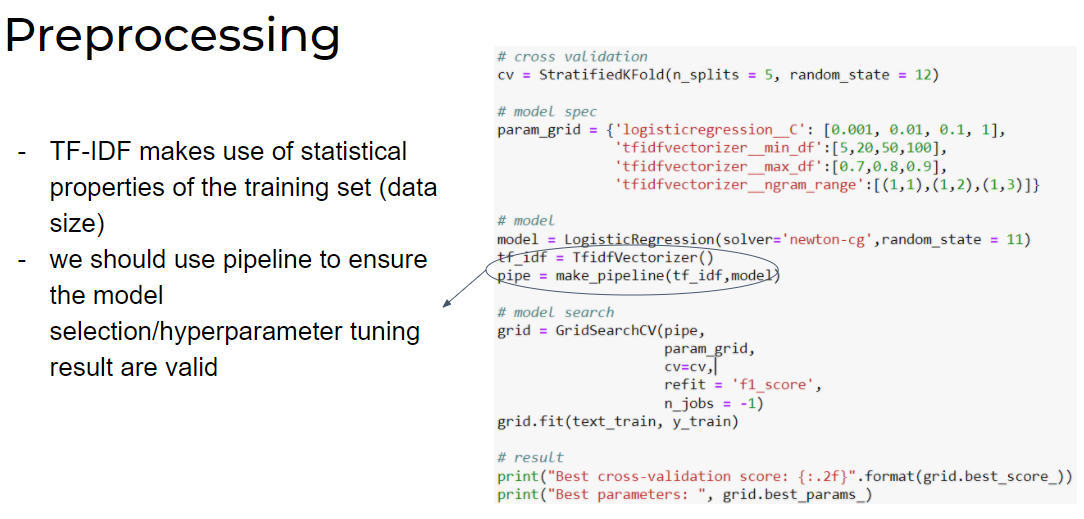

In [ ]:
sms['message_prep1'] = sms['message'].apply(to_lower) # hurufnya dikecilin semua (Hello dan hello) 
sms['message_prep2'] = sms['message_prep1'].apply(main_contraction) # melengkapkan kata / menghilangkan singkatan
sms['message_prep3'] = sms['message_prep2'].apply(remove_numbers) # menghilangkan angka
sms['message_prep4'] = sms['message_prep3'].apply(remove_punct) # menghilangkan tanda baca (Hello!, Hello?)
sms['message_prep5'] = sms['message_prep4'].apply(to_strip) # menghilangkan spasi yang berlebih
sms['message_prep6'] = sms['message_prep5'].apply(remove_stopwords) 

In [144]:
def text_processing(text):
    step1 = to_lower(text)
    step2 = main_contraction(step1)
    step3 = remove_numbers(step2)
    step4 = remove_punct(step3)
    step5 = to_strip(step4)
    step6 = remove_stopwords(step5)
    
    return step6

In [145]:
sms.head(1)

,Unnamed: 0,label,message,message_prep1,message_prep2,message_prep3,message_prep4,message_prep5,message_prep6,message_stem,message_lemma,length
0,0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,go jurong point crazy available bugis n great world la e buffet cine got amore wat,go jurong point crazi avail bugi n great world la e buffet cine got amor wat,go jurong point crazy available bugis n great world la e buffet cine got amore wat,111


In [150]:
tf_idf_prep = TfidfVectorizer(preprocessor=text_processing)
# model = Multinomial()
tf_idf_prep.fit(sms['message'])

TfidfVectorizer(preprocessor=<function text_processing at 0x000001D25A9F4798>)

In [151]:
coba = tf_idf_prep.transform(sms['message'])
coba.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [165]:
pd.Series(tf_idf_prep.get_feature_names()).isin(stopwords.words('english')).sum()

18

In [166]:
tf_idf_prep = TfidfVectorizer()
model = MultinomialNB()
pipe = Pipeline([
    ('preprocess', tf_idf_prep),
    ('model', model)    
])

param_grid = {
    'model__alpha': np.linspace(0,1,10)
}

In [168]:
from sklearn.model_selection import GridSearchCV

In [169]:
grid = GridSearchCV(pipe, param_grid, cv = 5)

In [170]:
grid.fit(text_train, y_train)

C:\Users\R7891\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\R7891\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\R7891\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\R7891\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\R7891\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             param_grid={'model__alpha': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])})

In [171]:
grid.best_estimator_

Pipeline(steps=[('preprocess', TfidfVectorizer()),
                ('model', MultinomialNB(alpha=0.1111111111111111))])

In [172]:
best_nb = grid.best_estimator_
best_nb.fit(text_train, y_train)
y_pred_bestNB = best_nb.predict(text_test)

In [173]:
print(classification_report(y_test, y_pred_bestNB))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.90      0.94       150

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In [174]:
print(classification_report(y_test, y_predNB))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.97      0.93      0.95       150

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



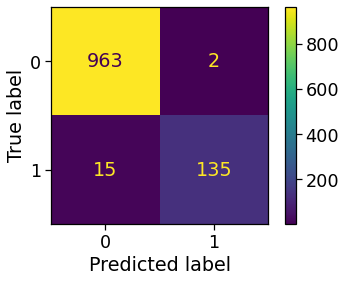

In [175]:
plot_confusion_matrix(best_nb, text_test, y_test)

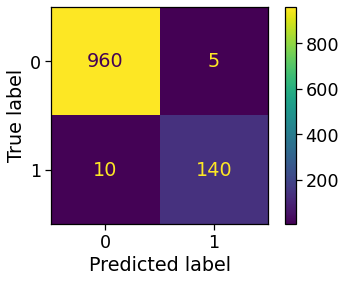

In [176]:
plot_confusion_matrix(spam_detectorNB, text_test, y_test)